In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [48]:
imgL = cv2.imread(r'C:\Users\MANAV MAHENDRU\Pictures\png files\JPEG\apple001S(1).jpg')
imgR = cv2.imread(r'C:\Users\MANAV MAHENDRU\Pictures\png files\JPEG\apple001S(2).jpg')

In [58]:
imgL_resized = cv2.resize(imgL, (1500,1200))
imgR_resized = cv2.resize(imgR,(1500,1200))

In [59]:
imgL_ = cv2.cvtColor(imgL_resized, cv2.COLOR_BGR2GRAY)
imgR_= cv2.cvtColor(imgR_resized, cv2.COLOR_BGR2GRAY)

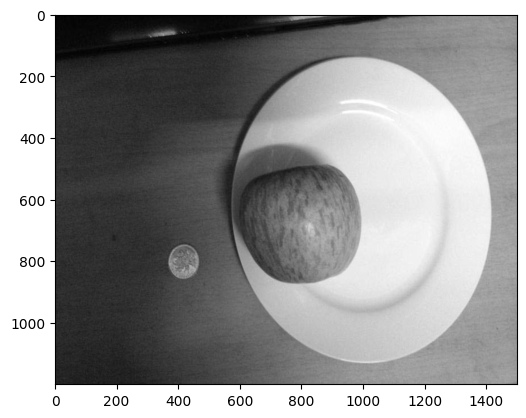

In [60]:
plt.imshow(imgL_,'gray')

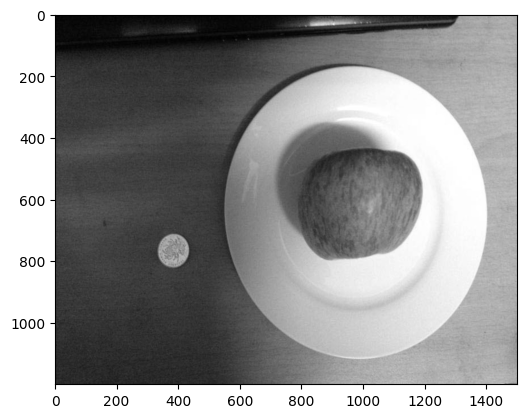

In [61]:
plt.imshow(imgR_,'gray')

In [78]:
dist = cv2.absdiff(imgL_,imgR_)

In [136]:
stereo = cv2.StereoBM_create(numDisparities=16, blockSize=5)
disparity = stereo.compute(imgL_, imgR_)
disparity_normalized = cv2.normalize(disparity, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)

In [137]:
thresh = cv2.threshold(disparity_normalized,100, 255, cv2.THRESH_BINARY)[1]
object_mask = np.zeros_like(thresh)
object_mask[420:850,810:1210] = 255 

In [138]:
contours, hierarchy = cv2.findContours(object_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [139]:
if len(contours) == 0:
    print("No contours found in object mask.")
    exit()

# Compute area of object mask
area = cv2.contourArea(contours[0])

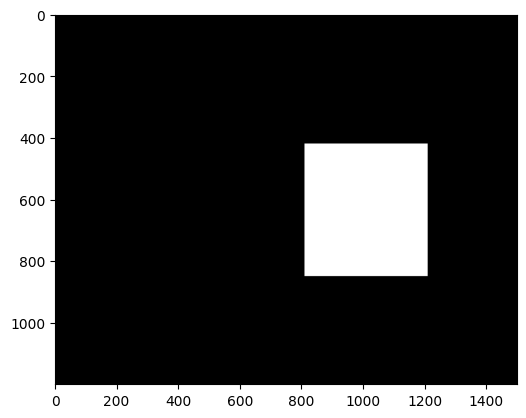

In [140]:
plt.imshow(object_mask,'gray')

In [141]:
depths = cv2.multiply(disparity_normalized, object_mask)
avg_depth = cv2.mean(depths, mask=object_mask)[0]
volume = area * avg_depth

In [151]:
print("Object volume: ", (volume/40**3))

Object volume:  214.61092814498545


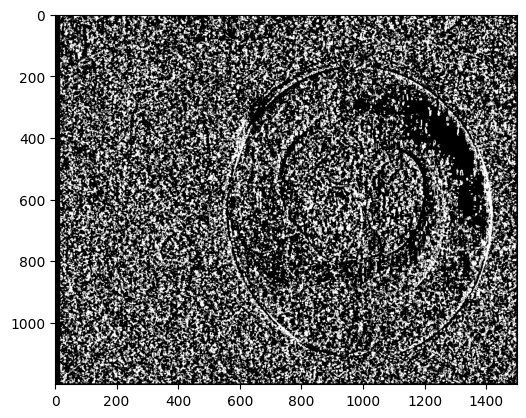

In [147]:
plt.imshow(disparity_normalized,'gray')